In [1]:
import os 
import astropy.io.fits as fits
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.cm as cm
import function_plot as f_plt

In [2]:
z='32'
work_dir='/export/home/extragal/zibetti/no_ownCloud/SteMaGE/data/SEDlibraries/Sandage_v4.1_Zfix_noburst_cb16MILES_1M/'
idx_file=work_dir+'sandage_varZ_v4.1_m32fix_noburst_100k_spec_dcombnull_idx_001.fits'
par_file=work_dir+'sandage_varZ_v4.1_m32fix_noburst_100k_spec_dcombnull_001_physpar_wagef.fits'
model_file=work_dir+'sandage_varZ_v4.1_m32fix_noburst_100k.fits'
file_pert=work_dir+'sandage_varZ_v4.1_m32fix_noburst_100k_spec_dcombnull_perterr_001.fits'


In [3]:
hdul_idx=fits.open(idx_file)
hdul_par=fits.open(par_file)
hdul_model=fits.open(model_file)
hdul_pert=fits.open(file_pert)


#d4000n=hdul_idx[1].data['D4000N'][...,4]
#hdhg=hdul_idx[1].data['HdHg'][...,4]
#Hb=hdul_idx[1].data['Lick_Hb'][...,4]
#mg2fe=hdul_idx[1].data['Mg2Fe'][...,4]
#mgfep=hdul_idx[1].data['MgFe_prime'][...,4]

d4000n=hdul_pert[1].data['D4000N_SIGMA200_PERT']
hdhg=hdul_pert[1].data['HDHG_SIGMA200_PERT']
Hb=hdul_pert[1].data['Lick_Hb_SIGMA200_PERT']
mg2fe=hdul_pert[1].data['Mg2Fe_SIGMA200_PERT']
mgfep=hdul_pert[1].data['MgFe_prime_SIGMA200_PERT']

#mag_u=hdul_par[1].data['ABMAG'][...,0]
#mag_g=hdul_par[1].data['ABMAG'][...,1]
#mag_r=hdul_par[1].data['ABMAG'][...,2]
#mag_i=hdul_par[1].data['ABMAG'][...,3]
#mag_z=hdul_par[1].data['ABMAG'][...,4]

mag_u=hdul_pert[1].data['ABMAG_U_PERT']
mag_g=hdul_pert[1].data['ABMAG_G_PERT']
mag_r=hdul_pert[1].data['ABMAG_R_PERT']
mag_i=hdul_pert[1].data['ABMAG_I_PERT']
mag_z=hdul_pert[1].data['ABMAG_Z_PERT']


age10=hdul_par[1].data['age10']
age25=hdul_par[1].data['age25']
age50=hdul_par[1].data['age50']
age75=hdul_par[1].data['age75']
age90=hdul_par[1].data['age90']

sigma_D4000n=hdul_pert[1].data['D4000N_ERR_SNR020']
sigma_hdhg=hdul_pert[1].data['HDHG_ERR_SNR020']
sigma_Hb=hdul_pert[1].data['LICK_HB_ERR_SNR020']
sigma_mgfep=hdul_pert[1].data['MGFE_PRIME_ERR_SNR020']
sigma_mg2fe=hdul_pert[1].data['MG2FE_ERR_SNR020']

sigma_u=hdul_pert[1].data['ERR_MAG_U']
sigma_g=hdul_pert[1].data['ERR_MAG_G']
sigma_r=hdul_pert[1].data['ERR_MAG_R']
sigma_i=hdul_pert[1].data['ERR_MAG_I']
sigma_z=hdul_pert[1].data['ERR_MAG_Z']

t_form=hdul_model[1].data['LOGTFORM']
tau=hdul_model[1].data['logtau']

d1090n50=np.log10((age10-age90)/age50)

In [4]:
sigma1=sigma_D4000n
sigma2=sigma_hdhg
sigma3=sigma_Hb
sigma4=sigma_mg2fe
sigma5=sigma_mgfep

sigma6=np.sqrt(sigma_u**2+sigma_r**2)
sigma7=np.sqrt(sigma_g**2+sigma_r**2)
sigma8=np.sqrt(sigma_r**2+sigma_i**2)
sigma9=np.sqrt(sigma_r**2+sigma_z**2)

In [5]:
n_chunks=5
for i_chunks in range(2, n_chunks+1):
    _idx_file=work_dir+'sandage_varZ_v4.1_m32fix_noburst_100k_spec_dcombnull_idx_{:03d}.fits'
    _par_file=work_dir+'sandage_varZ_v4.1_m32fix_noburst_100k_spec_dcombnull_{:03d}_physpar_wagef.fits'
    _pert_file=work_dir+'sandage_varZ_v4.1_m32fix_noburst_100k_spec_dcombnull_perterr_{:03d}.fits'
    
    _hdul_idx=fits.open(_idx_file.format(i_chunks))
    _hdul_par=fits.open(_par_file.format(i_chunks))
    _hdul_pert=fits.open(_pert_file.format(i_chunks))
    
    _d4000n=_hdul_pert[1].data['D4000N_SIGMA200_PERT']
    _hdhg=_hdul_pert[1].data['HDHG_SIGMA200_PERT']
    _Hb=_hdul_pert[1].data['Lick_Hb_SIGMA200_PERT']
    _mg2fe=_hdul_pert[1].data['Mg2Fe_SIGMA200_PERT']
    _mgfep=_hdul_pert[1].data['MgFe_prime_SIGMA200_PERT']

    _mag_u=_hdul_pert[1].data['ABMAG_U_PERT']
    _mag_g=_hdul_pert[1].data['ABMAG_G_PERT']
    _mag_r=_hdul_pert[1].data['ABMAG_R_PERT']
    _mag_i=_hdul_pert[1].data['ABMAG_I_PERT']
    _mag_z=_hdul_pert[1].data['ABMAG_Z_PERT']

    _age10=_hdul_par[1].data['age10']
    _age25=_hdul_par[1].data['age25']
    _age50=_hdul_par[1].data['age50']
    _age75=_hdul_par[1].data['age75']
    _age90=_hdul_par[1].data['age90']
    
    _sigma_D4000n=hdul_pert[1].data['D4000N_ERR_SNR020']
    _sigma_hdhg=hdul_pert[1].data['HDHG_ERR_SNR020']
    _sigma_Hb=hdul_pert[1].data['LICK_HB_ERR_SNR020']
    _sigma_mgfep=hdul_pert[1].data['MGFE_PRIME_ERR_SNR020']
    _sigma_mg2fe=hdul_pert[1].data['MG2FE_ERR_SNR020']
    
    _sigma_u=hdul_pert[1].data['ERR_MAG_U']
    _sigma_g=hdul_pert[1].data['ERR_MAG_G']
    _sigma_r=hdul_pert[1].data['ERR_MAG_R']
    _sigma_i=hdul_pert[1].data['ERR_MAG_I']
    _sigma_z=hdul_pert[1].data['ERR_MAG_Z']
    
    sigma_D4000n=np.append(sigma_D4000n, _sigma_D4000n)
    sigma_hdhg=np.append(sigma_hdhg, _sigma_hdhg)
    sigma_Hb=np.append(sigma_Hb, _sigma_Hb)
    sigma_mgfep=np.append(sigma_mgfep, _sigma_mgfep)
    sigma_mg2fe=np.append(sigma_mg2fe, _sigma_mg2fe)
    
    sigma_u=np.append(sigma_u, _sigma_u)
    sigma_g=np.append(sigma_g, _sigma_g)
    sigma_r=np.append(sigma_r, _sigma_r)
    sigma_i=np.append(sigma_i, _sigma_i)
    sigma_z=np.append(sigma_z, _sigma_z)

    
    d4000n=np.append(d4000n, _d4000n)
    hdhg=np.append(hdhg, _hdhg)
    Hb=np.append(Hb, _Hb)
    mg2fe=np.append(mg2fe, _mg2fe)
    mgfep=np.append(mgfep, _mgfep)
    
    mag_u=np.append(mag_u, _mag_u)
    mag_g=np.append(mag_g, _mag_g)
    mag_r=np.append(mag_r, _mag_r)
    mag_i=np.append(mag_i, _mag_i)
    mag_z=np.append(mag_z, _mag_z)
    
    age10=np.append(age10, _age10)
    age25=np.append(age25, _age25)
    age50=np.append(age50, _age50)
    age75=np.append(age75, _age75)
    age90=np.append(age90, _age90)
    
    
d1090n50=np.log10((age10-age90)/age50)

sigma1=sigma_D4000n
sigma2=sigma_hdhg
sigma3=sigma_Hb
sigma4=sigma_mg2fe
sigma5=sigma_mgfep

sigma6=np.sqrt(sigma_u**2+sigma_r**2)
sigma7=np.sqrt(sigma_g**2+sigma_r**2)
sigma8=np.sqrt(sigma_r**2+sigma_i**2)
sigma9=np.sqrt(sigma_r**2+sigma_z**2)

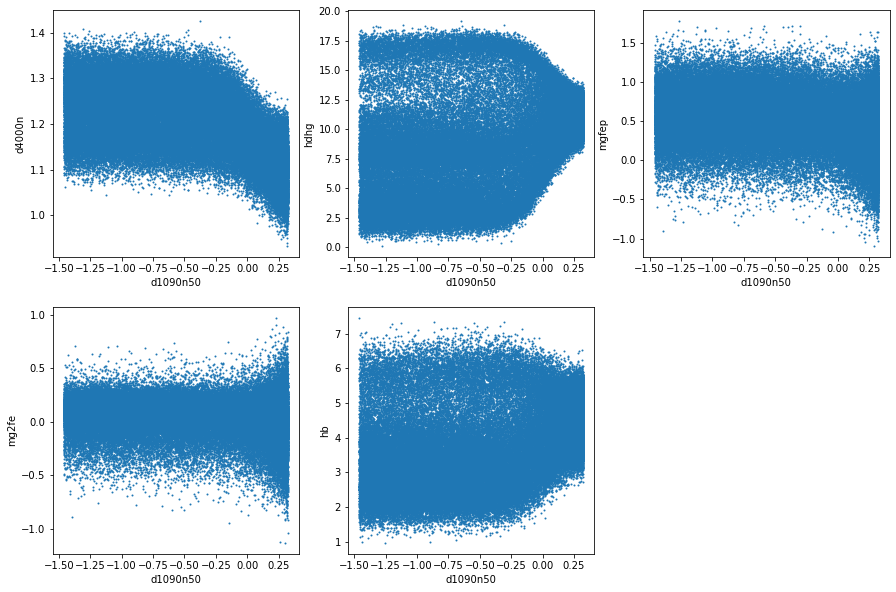

In [6]:
fig_res_tot=f_plt.idx_resol(d1090n50,d4000n,hdhg, mgfep, mg2fe, Hb, par_name='d1090n50', idx_name=['d4000n', 'hdhg', 'mgfep', 'mg2fe', 'hb'], figsize=(15,10))

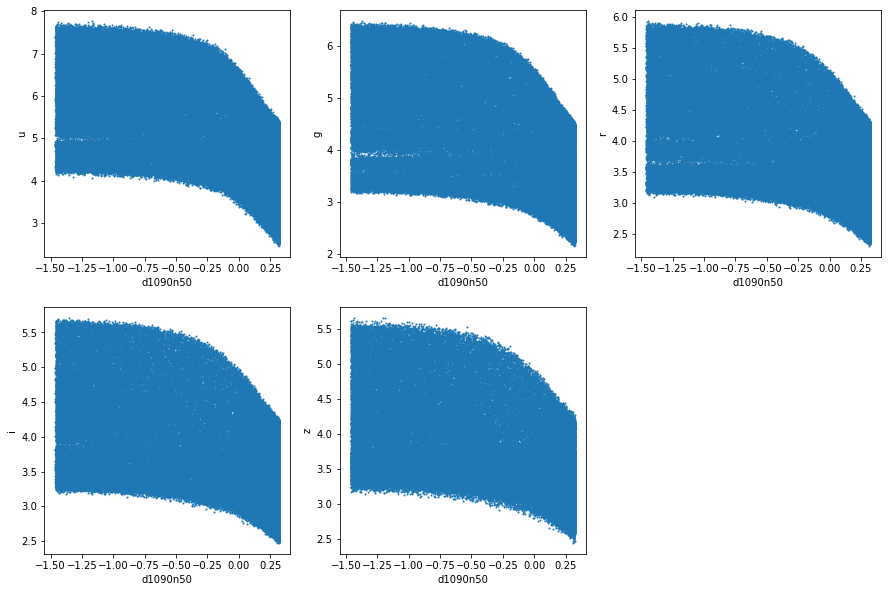

In [7]:
fig_res_tot_mag=f_plt.idx_resol(d1090n50,mag_u,mag_g, mag_r, mag_i, mag_z, par_name='d1090n50', idx_name=['u', 'g', 'r', 'i', 'z'], figsize=(15,10))

(array([ 1.,  0.,  0.,  0.,  1.,  0.,  2.,  5.,  2.,  1.,  9.,  3.,  9.,
        16., 23., 14.,  9., 25., 34., 27., 29., 33., 30., 42., 35., 27.,
        31., 39., 28., 30., 29., 18., 22., 13., 16., 10., 14.,  4.,  3.,
         5.,  0.,  2.,  5.,  2.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([3.172955 , 3.177438 , 3.181921 , 3.186404 , 3.190887 , 3.19537  ,
        3.199853 , 3.204336 , 3.208819 , 3.213302 , 3.217785 , 3.2222679,
        3.2267509, 3.231234 , 3.235717 , 3.2402   , 3.244683 , 3.249166 ,
        3.253649 , 3.258132 , 3.262615 , 3.267098 , 3.271581 , 3.276064 ,
        3.280547 , 3.28503  , 3.2895129, 3.2939959, 3.2984788, 3.3029618,
        3.3074448, 3.3119278, 3.3164108, 3.3208938, 3.3253767, 3.3298597,
        3.3343427, 3.3388257, 3.343309 , 3.347792 , 3.352275 , 3.3567579,
        3.3612409, 3.3657238, 3.3702068, 3.3746898, 3.3791728, 3.3836558,
        3.3881388, 3.3926218, 3.3971047], dtype=float32),
 <BarContainer object of 50 artists>)

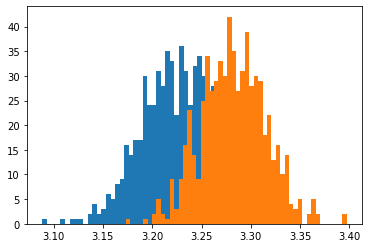

In [8]:
idx_ref=((d1090n50<-1.0)&(np.log10(age50)<8.75)& (np.log10(age50)>8.7))

isto_pert1=np.histogram(mag_r[idx_ref], bins=50)
isto_pert2=np.histogram(mag_i[idx_ref], bins=50)
isto_pert=np.histogram(mag_i[idx_ref]-mag_r[idx_ref], bins=50)


plt.hist(mag_r[idx_ref], bins=50)
plt.hist(mag_i[idx_ref], bins=50)
#plt.plot(isto_pert[1][:-1], isto_pert[0])

3.2240474
3.2824895
0.058442324
0.03555352
0.03277313
0.042084455


(array([ 2.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  5.,  3.,  3.,  8., 11.,
        12., 14., 12., 24., 18., 20., 25., 30., 23., 25., 31., 29., 26.,
        25., 35., 35., 31., 28., 26., 15., 18., 20., 19., 10.,  8., 11.,
         7., 14.,  4.,  5.,  3.,  3.,  4.,  0.,  1.,  1.,  2.]),
 array([-0.07244468, -0.06740459, -0.0623645 , -0.05732441, -0.05228433,
        -0.04724424, -0.04220415, -0.03716406, -0.03212398, -0.02708389,
        -0.0220438 , -0.01700371, -0.01196362, -0.00692354, -0.00188345,
         0.00315664,  0.00819673,  0.01323681,  0.0182769 ,  0.02331699,
         0.02835708,  0.03339716,  0.03843725,  0.04347734,  0.04851743,
         0.05355752,  0.0585976 ,  0.06363769,  0.06867778,  0.07371786,
         0.07875796,  0.08379804,  0.08883813,  0.09387822,  0.0989183 ,
         0.10395839,  0.10899848,  0.11403856,  0.11907866,  0.12411875,
         0.12915882,  0.13419892,  0.13923901,  0.1442791 ,  0.14931919,
         0.15435927,  0.15939936,  0.16443944,  0.16947953,

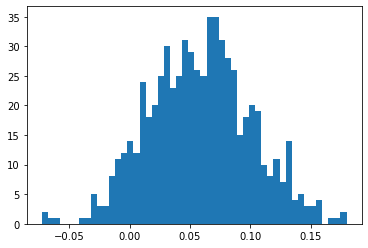

In [9]:
idx_ref=((d1090n50<-1.0)&(np.log10(age50)<8.75)& (np.log10(age50)>8.7))
arr=mag_i[idx_ref]-mag_r[idx_ref]
isto_pert=np.histogram(arr, bins=50)

print(np.mean(mag_r[idx_ref]))
print(np.mean(mag_i[idx_ref]))
print(np.mean(mag_i[idx_ref]-mag_r[idx_ref]))

print(np.std(mag_r[idx_ref]))
print(np.std(mag_i[idx_ref]))
print(np.std(mag_i[idx_ref]-mag_r[idx_ref]))


plt.hist(mag_i[idx_ref]-mag_r[idx_ref], bins=50)

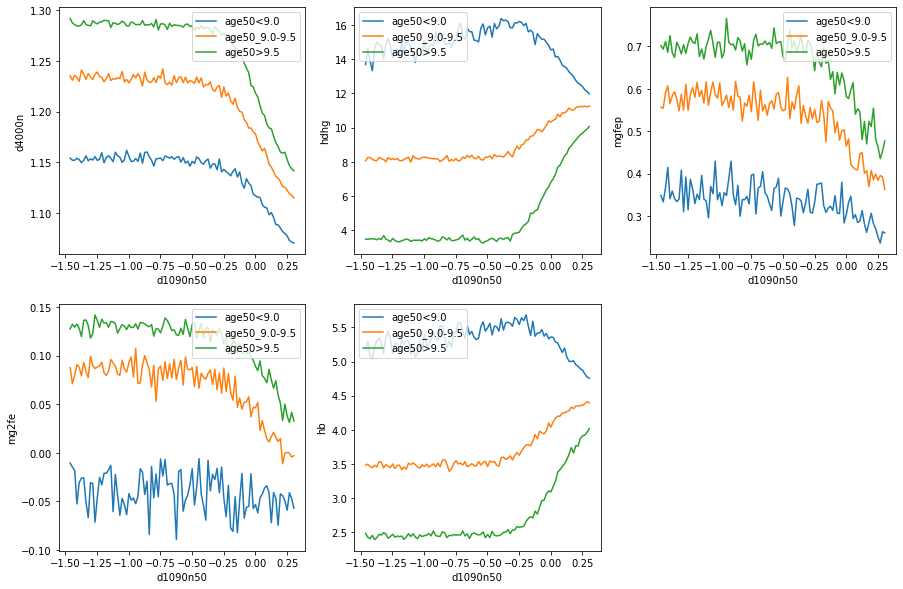

In [10]:
idx_sel1=(np.log10(age50) <9.0) 
idx_sel2=(np.log10(age50) < 9.5) & (np.log10(age50) >9.0)
idx_sel3=(np.log10(age50) >9.5) 

fig_resol3_idx=f_plt.idx_resol_stat4(d1090n50,idx_sel1,idx_sel2,idx_sel3,d4000n,hdhg, mgfep, mg2fe, Hb, x_name='d1090n50',par_name=['age50<9.0','age50_9.0-9.5','age50>9.5'], idx_name=['d4000n', 'hdhg', 'mgfep', 'mg2fe', 'hb'],bins=100, figsize=(15,10))

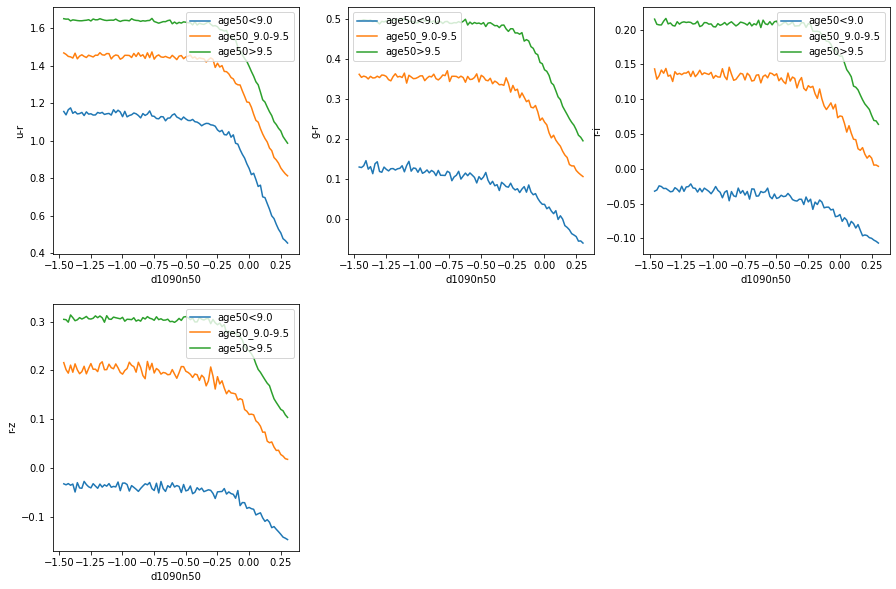

In [11]:
idx_sel1=(np.log10(age50) <9.0) 
idx_sel2=(np.log10(age50) < 9.5) & (np.log10(age50) >9.0)
idx_sel3=(np.log10(age50) >9.5) 

fig_resol_col=f_plt.idx_resol_stat4col(d1090n50,idx_sel1,idx_sel2,idx_sel3,mag_u-mag_r,mag_g-mag_r, mag_r-mag_i, mag_r-mag_z,figsize=(15,10), bins=100)

In [12]:
bins=83
bin_age50=np.histogram(np.log10(age50), bins=bins, range=(6.0, 10.15))[1]

In [13]:
np.size(bin_age50)

31

In [14]:
t_res=np.array([0.0]*bins)

2676
age50 bin: 8.65 - 8.7
d1090n50 limit tot: -0.10423583984375001
d1090n50 limit idx: -0.07559814453125002
d1090n50 limit col: -0.06436767578125002
sigma_idx1: 0.028223963
sigma_idx2: 0.45765406
sigma_idx3: 0.4007966
sigma_idx4: 0.24282339
sigma_idx5: 0.30789348
sigma_col1: 0.05235088
sigma_col2: 0.04182842
sigma_col3: 0.04076026
sigma_col4: 0.061562743

3042
age50 bin: 8.7 - 8.75
d1090n50 limit tot: -0.07503662109375003
d1090n50 limit idx: -0.07222900390625003
d1090n50 limit col: -0.02056884765625002
sigma_idx1: 0.032070532
sigma_idx2: 0.51916385
sigma_idx3: 0.41112363
sigma_idx4: 0.22651511
sigma_idx5: 0.35446128
sigma_col1: 0.06040109
sigma_col2: 0.04216598
sigma_col3: 0.042084455
sigma_col4: 0.057904325

3155
age50 bin: 8.75 - 8.8
d1090n50 limit tot: -0.06717529296875002
d1090n50 limit idx: -0.02449951171875002
d1090n50 limit col: -0.023937988281250024
sigma_idx1: 0.029839361
sigma_idx2: 0.5765782
sigma_idx3: 0.405333
sigma_idx4: 0.22405544
sigma_idx5: 0.34606197
sigma_col1: 0.06

/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:745: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(1,3,figsize=figsize)


d1090n50 limit tot: -0.12445068359375003
d1090n50 limit idx: -0.11322021484375003
d1090n50 limit col: -0.06829833984375003
sigma_idx1: 0.030944977
sigma_idx2: 0.5734963
sigma_idx3: 0.3603581
sigma_idx4: 0.0834033
sigma_idx5: 0.26688766
sigma_col1: 0.058598194
sigma_col2: 0.042269867
sigma_col3: 0.042411227
sigma_col4: 0.05384596

3039
age50 bin: 9.75 - 9.8
d1090n50 limit tot: -0.11265869140625004
d1090n50 limit idx: -0.10928955078125002
d1090n50 limit col: -0.07110595703125003
sigma_idx1: 0.03149807
sigma_idx2: 0.6200723
sigma_idx3: 0.36435944
sigma_idx4: 0.080193534
sigma_idx5: 0.26267517
sigma_col1: 0.05808432
sigma_col2: 0.04415736
sigma_col3: 0.042845644
sigma_col4: 0.059466805

2769
age50 bin: 9.8 - 9.85
d1090n50 limit tot: -0.13287353515625003
d1090n50 limit idx: -0.10704345703125001
d1090n50 limit col: -0.07166748046875002
sigma_idx1: 0.031509575
sigma_idx2: 0.5814666
sigma_idx3: 0.36120427
sigma_idx4: 0.079224974
sigma_idx5: 0.2630008
sigma_col1: 0.058935918
sigma_col2: 0.04062

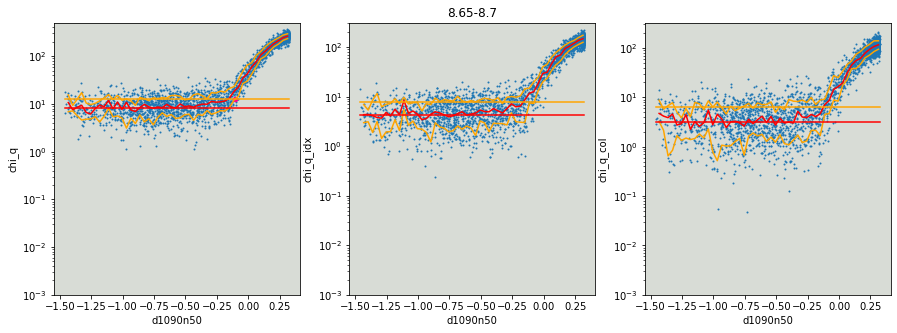

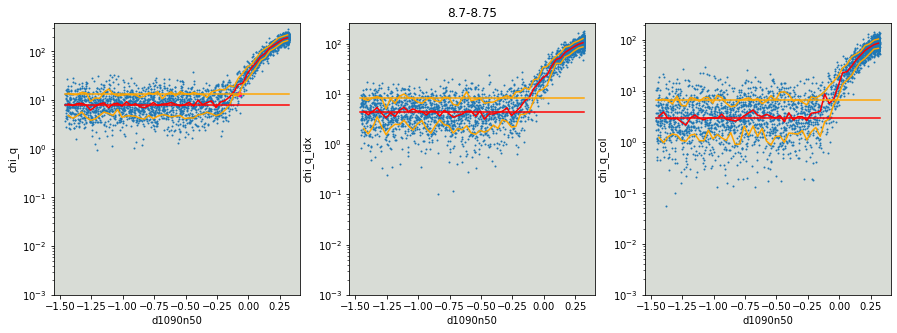

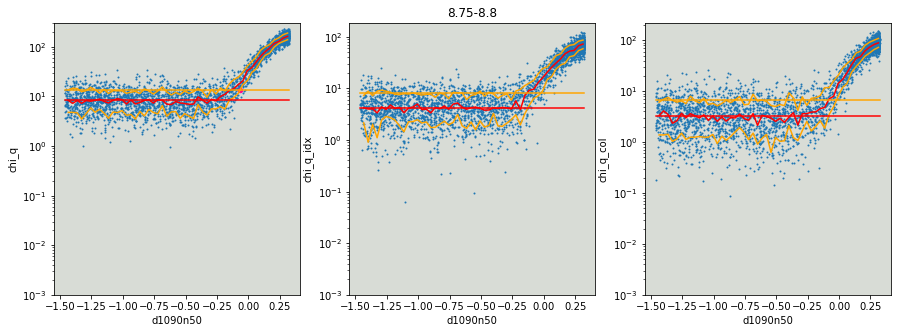

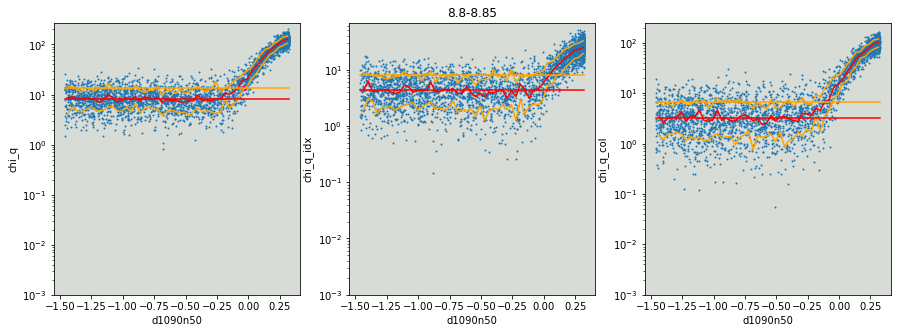

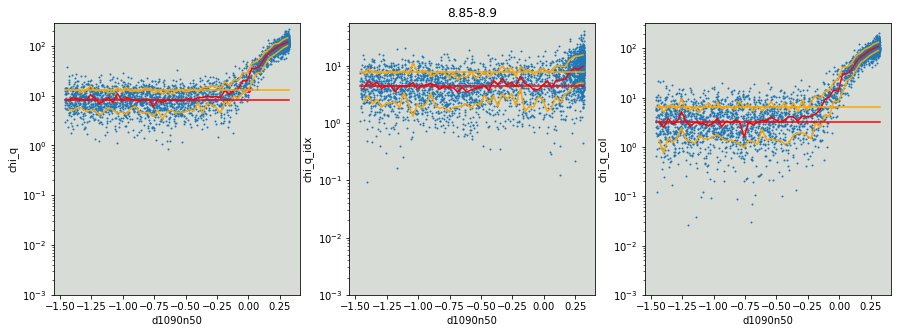

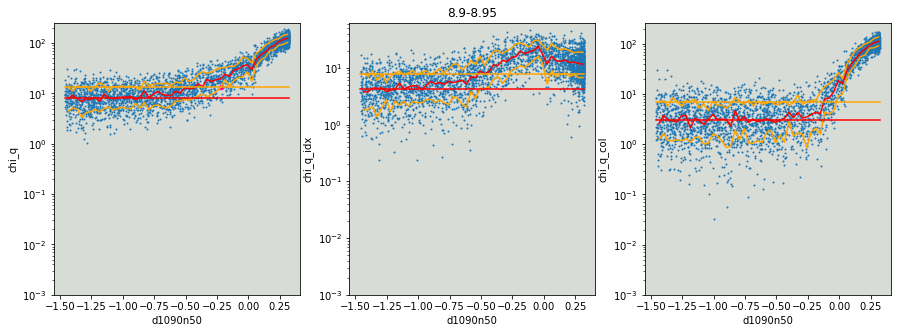

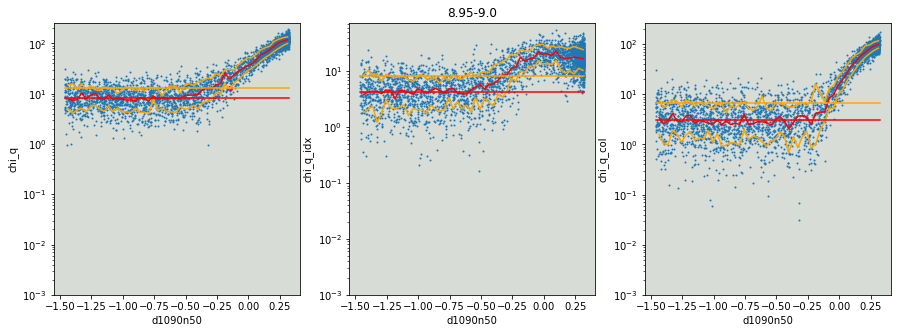

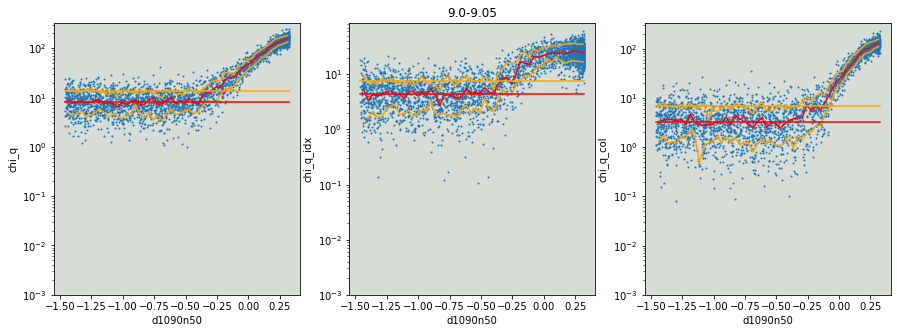

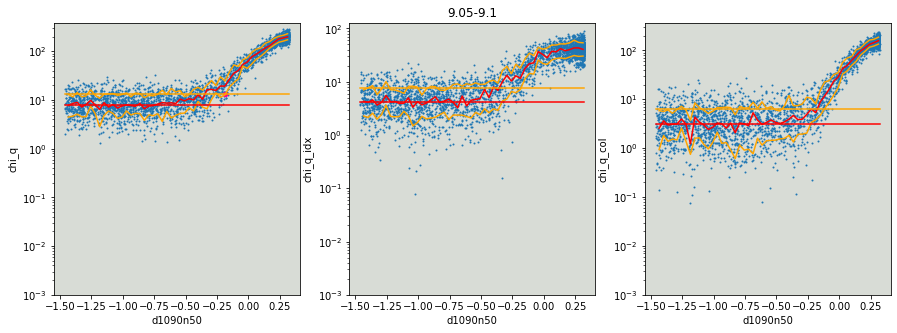

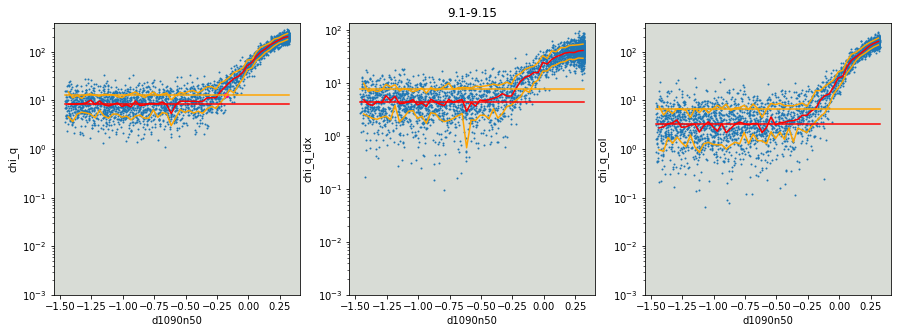

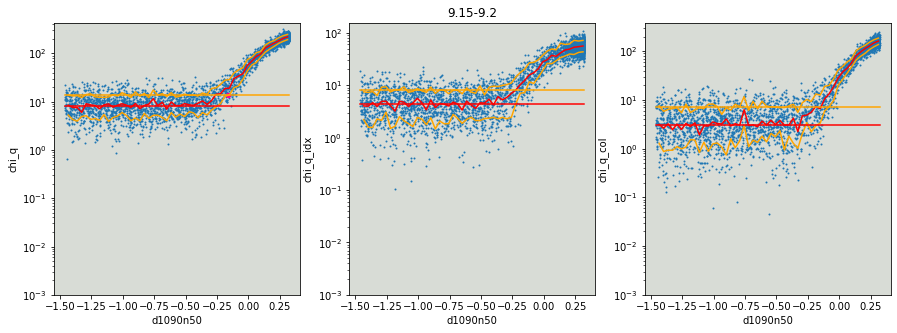

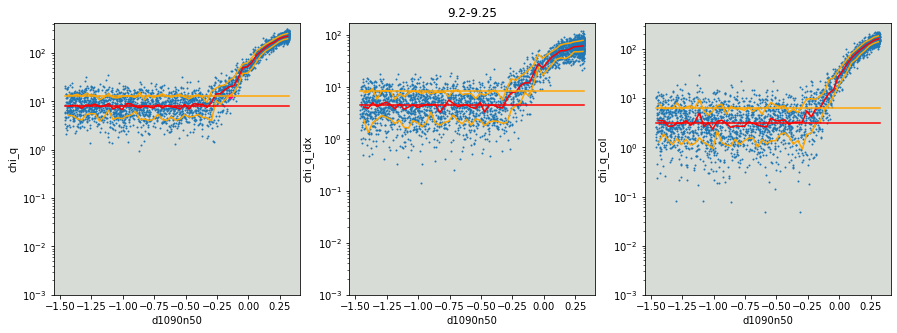

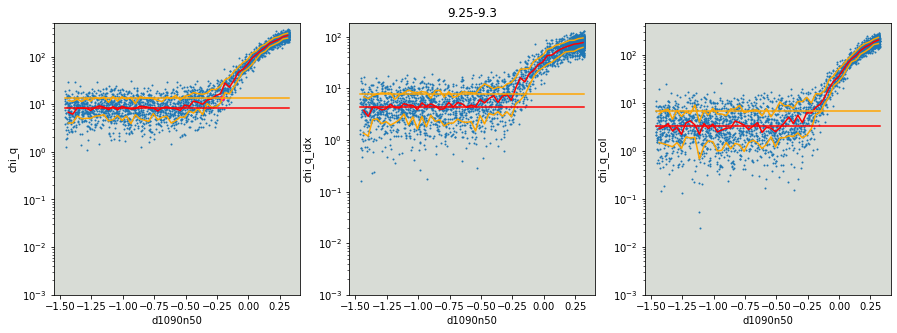

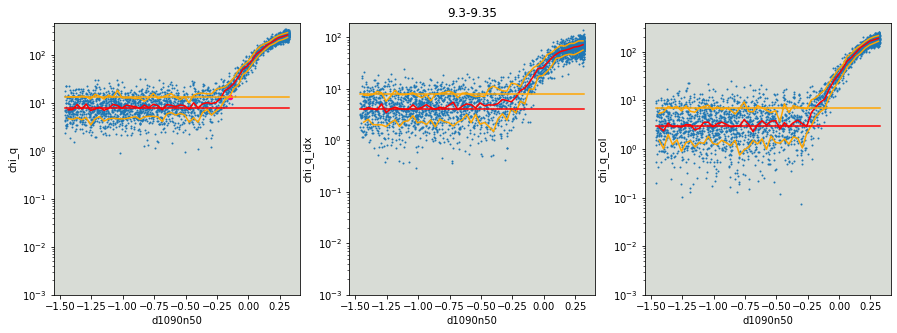

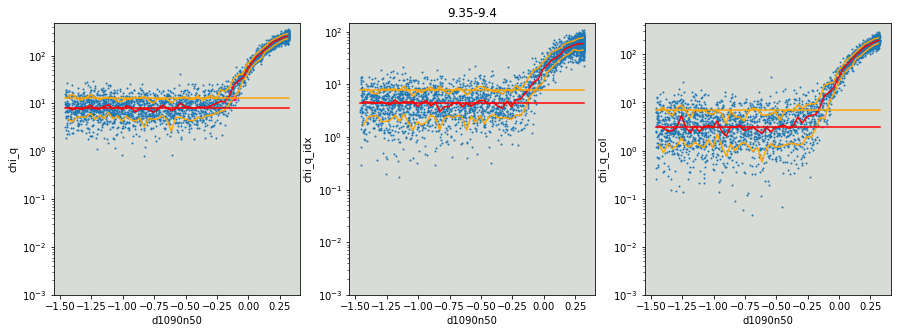

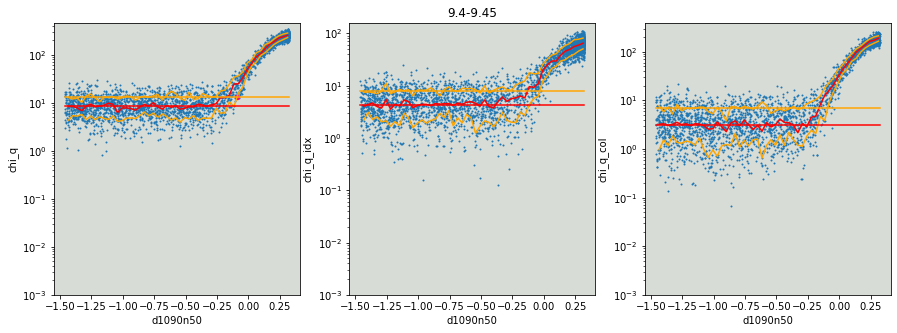

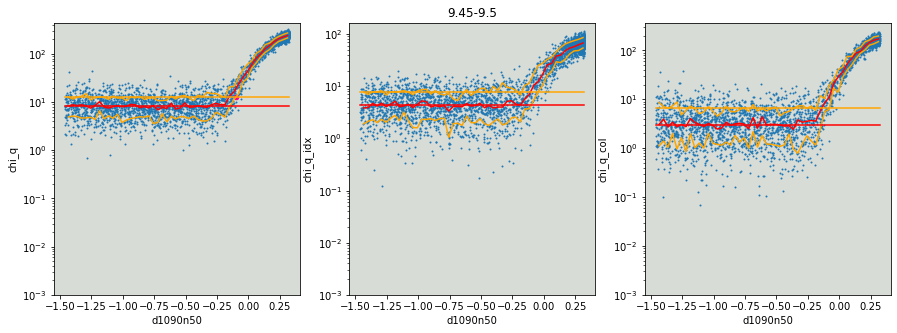

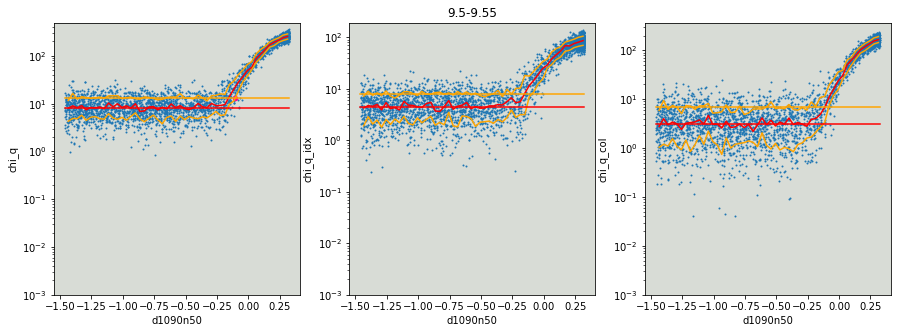

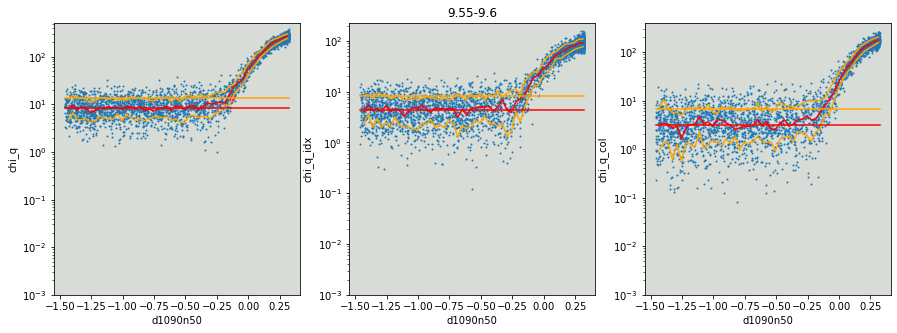

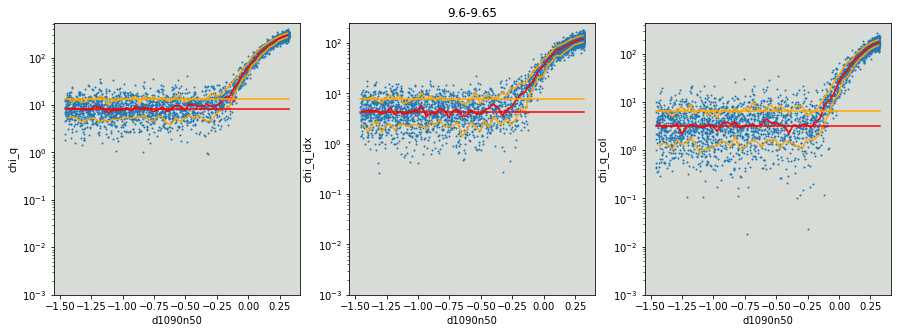

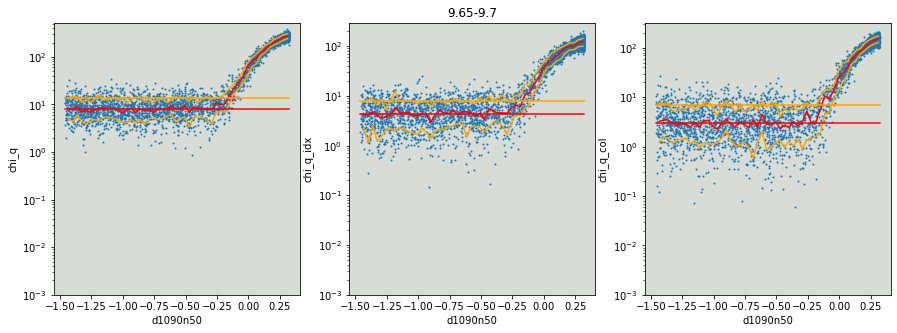

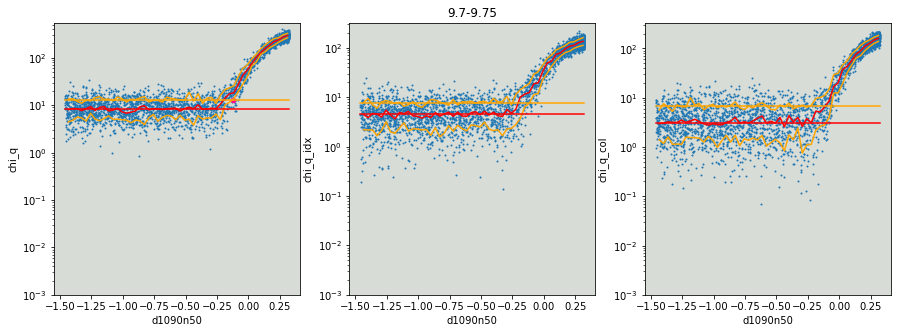

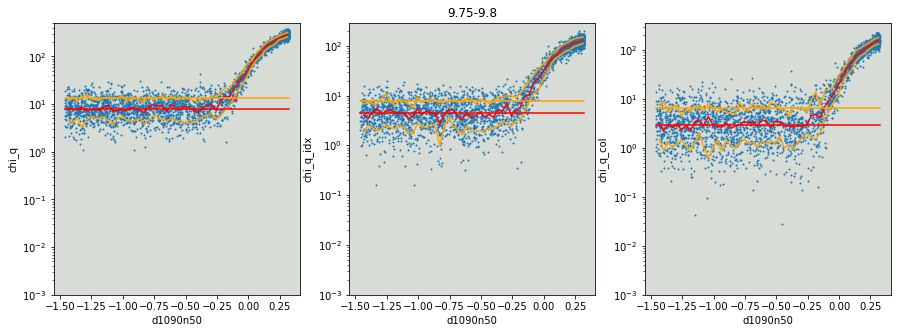

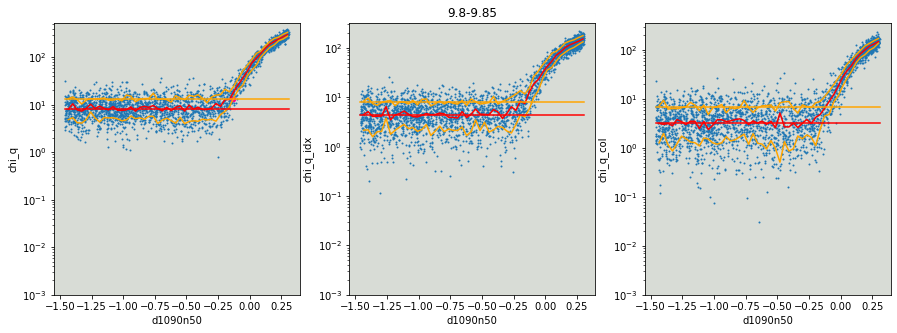

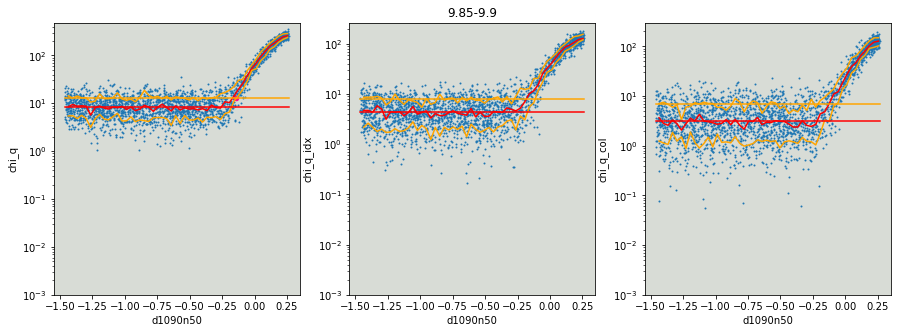

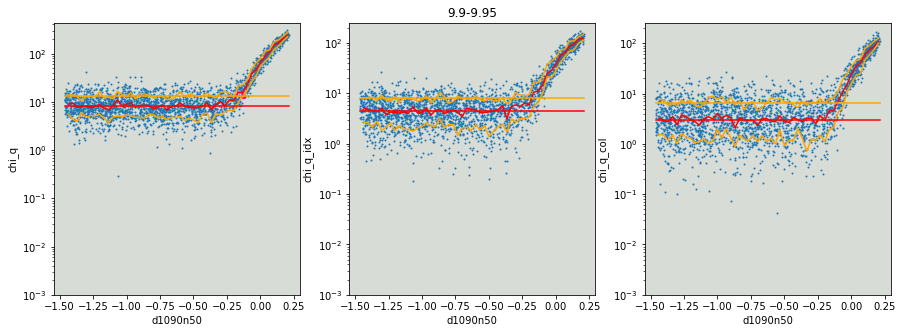

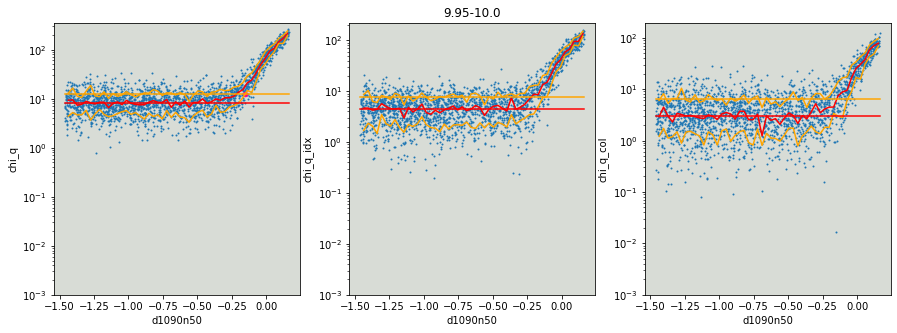

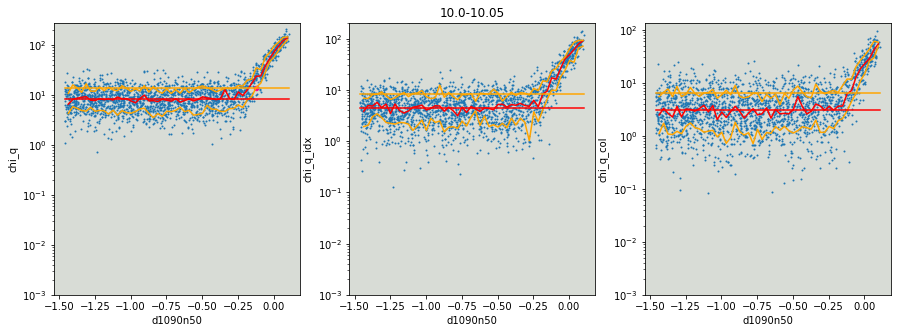

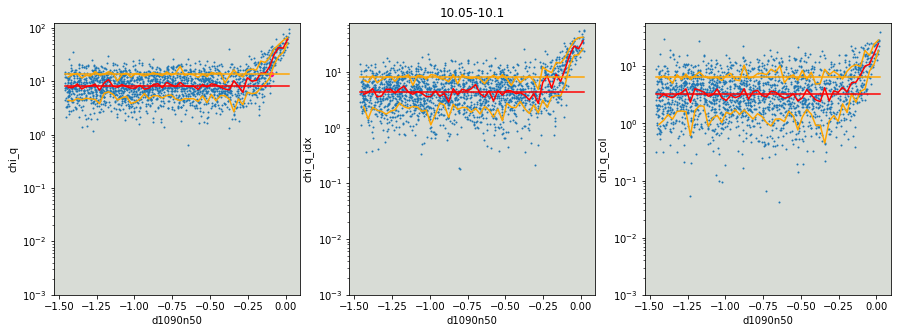

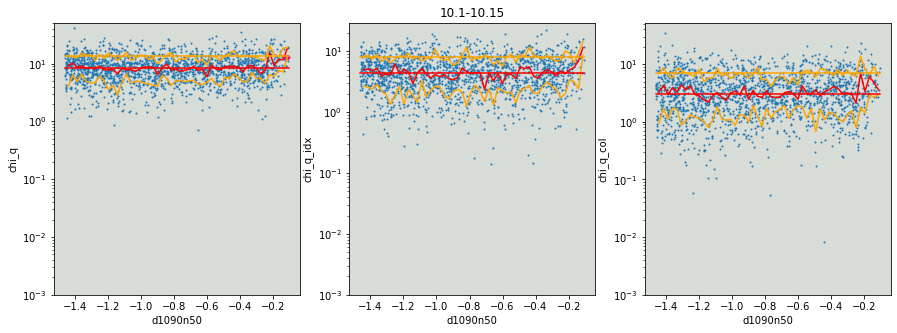

In [15]:
for i in range(0, bins):
    idx_ref=((d1090n50<-1.0)&(np.log10(age50)<bin_age50[i+1])& (np.log10(age50)>bin_age50[i]))
    idx_sel=((np.log10(age50)<bin_age50[i+1])& (np.log10(age50)>bin_age50[i]))
    print(np.sum(idx_sel))
    print('age50 bin:', bin_age50[i],'-', bin_age50[i+1])
    #fig,t_res[i]=f_plt.chi_q(d1090n50,d4000n,hdhg,Hb,mg2fe,mgfep,mag_u-mag_r,mag_g-mag_r, mag_r-mag_i, mag_r-mag_z, idx_sel,idx_ref,sigma1=sigma1,sigma2=sigma2,sigma3=sigma3,sigma4=sigma4,sigma5=sigma5,sigma6=sigma6,sigma7=sigma7,sigma8=sigma8,sigma9=sigma9,figsize=(15,5), title='nb, m62fix, obs,age50:9.45-9.5', ylim=[0.001,None], toll=0.01,sigma_obs=True )
    fig,t_res[i]=f_plt.chi_q(d1090n50,d4000n,hdhg,Hb,mg2fe,mgfep,mag_u-mag_r,mag_g-mag_r, mag_r-mag_i, mag_r-mag_z, idx_sel,idx_ref,figsize=(15,5), title=str(bin_age50[i])+'-'+str(bin_age50[i+1]), ylim=[0.001,None], toll=0.001 )
    
    print('')

In [16]:
np.sum(((d1090n50<-1.0)&(np.log10(age50)<10.15)& (np.log10(age50)>10.1) &(t_form<10.15)))

486

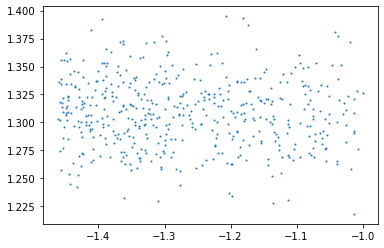

In [17]:
idx=((d1090n50<-1.0)&(np.log10(age50)<10.15)& (np.log10(age50)>10.1) &(t_form<10.15))
plt.scatter(d1090n50[idx], d4000n[idx], s=1)

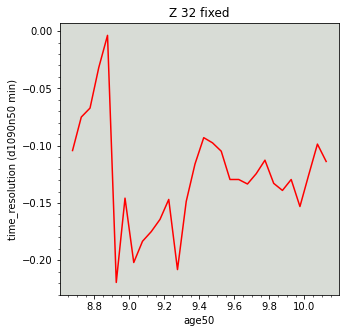

In [18]:
age50_binned=[0.0]*bins
for i in range(0, bins):
    age50_binned[i]=(bin_age50[i]+bin_age50[i+1])/2.0
    


fig, axs=plt.subplots(figsize=(5,5))
axs.plot(age50_binned, t_res, color='red')
axs.set_xlabel('age50')
axs.set_ylabel('time_resolution (d1090n50 min)')
axs.set_title('Z '+z+' fixed')
axs.minorticks_on()
axs.set_facecolor('#d8dcd6')

In [19]:
z32=-1.69897
z42=-0.69897
z52=-0.39794
z62=0.0
z72=0.39794

In [20]:
Z=[z32,z42,z52,z62,z72]

In [21]:
bin_z=np.histogram(Z, bins=5)[1]

In [22]:
bin_z

array([-1.69897 , -1.279588, -0.860206, -0.440824, -0.021442,  0.39794 ])

In [23]:
x,y=np.meshgrid(bin_age50, bin_z)

In [24]:
np.shape(y)

(6, 31)

In [25]:
time_res_file=work_dir+'Time_resol_Zfix_SNR100_tot.fits'
list_t=fits.open(time_res_file)

In [26]:
list_t.info()

Filename: /home/edoardo/Desktop/TESI/models/Sandage_v4.1_Zfix_noburst_bc03MILES_100k/Time_resol_Zfix_SNR100_tot.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     18   30R x 5C   [D, D, D, D, D]   


In [27]:
table_t_res=(list_t[1].data)

In [28]:
t_32=table_t_res['Log_d1090n50_min_z32']
t_42=table_t_res['Log_d1090n50_min_z42']
t_52=table_t_res['Log_d1090n50_min_z52']
t_62=table_t_res['Log_d1090n50_min_z62']
t_72=table_t_res['Log_d1090n50_min_z72']

[Text(0, -1.75, ''),
 Text(0, -1.5, ''),
 Text(0, -1.25, ''),
 Text(0, -1.0, ''),
 Text(0, -0.75, ''),
 Text(0, -0.5, ''),
 Text(0, -0.25, ''),
 Text(0, 0.0, ''),
 Text(0, 0.25, ''),
 Text(0, 0.5, '')]

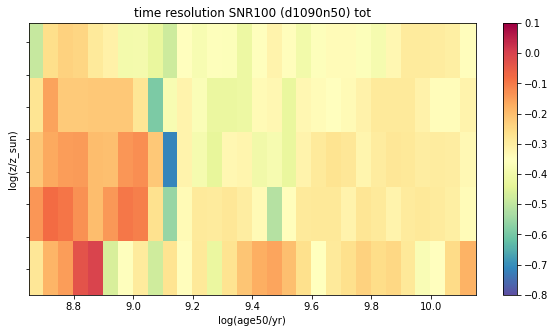

In [29]:
fig, ax=plt.subplots(figsize=(10,5))
im=ax.pcolormesh(x, y, [t_32, t_42, t_52, t_62, t_72],cmap=cm.Spectral_r,vmin=-0.8, vmax=0.1)
fig.colorbar(im, ax=ax)
ax.set_xlabel('log(age50/yr)')
ax.set_ylabel('log(z/z_sun)')
ax.set_title('time resolution SNR100 (d1090n50) tot')
ax.set_yticklabels([])

In [30]:
t_32

array([-0.2805542 , -0.18341064, -0.14859619, -0.03292236, -0.00203857,
       -0.46192627, -0.35523682, -0.29290771, -0.47371826, -0.26932373,
       -0.34456787, -0.28560791, -0.42037354, -0.26932373, -0.20980225,
       -0.17330322, -0.15926514, -0.1991333 , -0.26314697, -0.35130615,
       -0.28673096, -0.26427002, -0.23731689, -0.25528564, -0.24798584,
       -0.28448486, -0.371521  , -0.34737549, -0.25247803, -0.17947998])

Text(0, 0.5, 'time_resolution (d1090n50 min)')

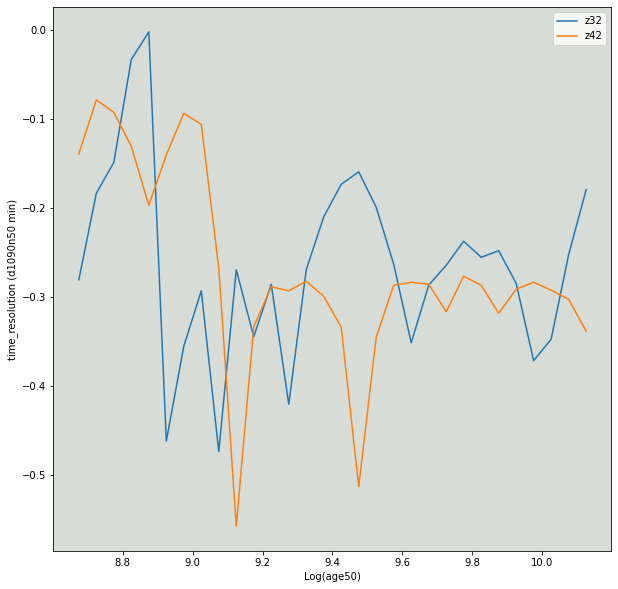

In [31]:
fig, axs=plt.subplots(figsize=(10,10))
axs.plot(age50_binned, t_32, label='z32')
axs.plot(age50_binned, t_42, label='z42')

axs.legend(loc='upper right')
axs.set_facecolor('#d8dcd6')
axs.set_xlabel('Log(age50)')
axs.set_ylabel('time_resolution (d1090n50 min)')

Text(0, 0.5, 'time_resolution (d1090n50 min)')

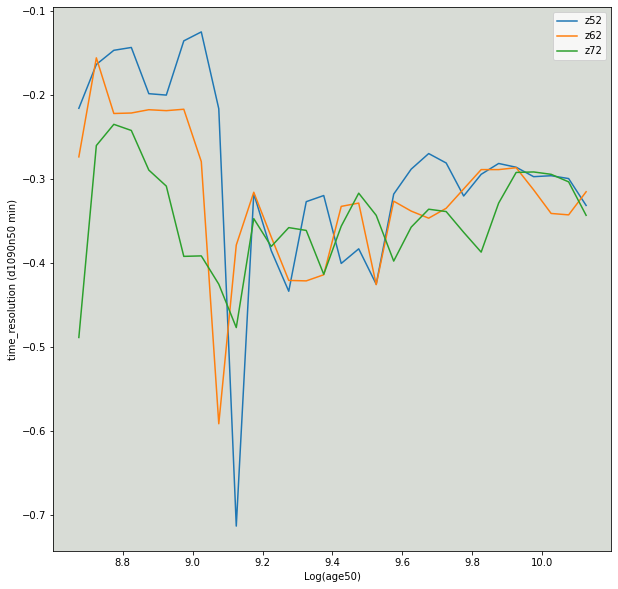

In [32]:
fig, axs=plt.subplots(figsize=(10,10))

axs.plot(age50_binned, t_52, label='z52')
axs.plot(age50_binned, t_62, label='z62')
axs.plot(age50_binned, t_72, label='z72')
axs.legend(loc='upper right')
axs.set_facecolor('#d8dcd6')
axs.set_xlabel('Log(age50)')
axs.set_ylabel('time_resolution (d1090n50 min)')

Text(0, 0.5, 'log(tau/t_form)')

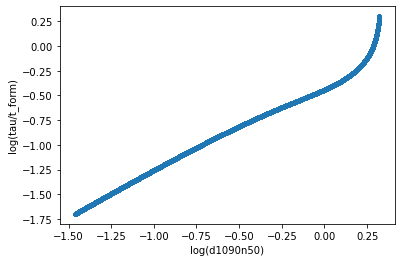

In [35]:
plt.scatter(d1090n50, tau-t_form, s=10)
plt.xlabel('log(d1090n50)')
plt.ylabel('log(tau/t_form)')

In [36]:
10**0.25

1.7782794100389228

In [39]:
10**(-1.25)

0.05623413251903491